# **Análisis contaminantes registrados**

*Nota: hacer el trabajo con el nuevo conjunto de datos llamado "CSV_Datos_Ok.csv"*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
datosContaminantes = pd.read_csv("CSV_ unidos.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

/tmp/ipykernel_877772/2458259622.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  datosContaminantes = pd.read_csv("CSV_ unidos.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})


,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-01-01,0,-999.0,151,1,12,pm25
1,2012-01-01,1,-999.0,151,1,12,pm25
2,2012-01-01,2,-999.0,151,1,12,pm25
3,2012-01-01,3,-999.0,151,1,12,pm25
4,2012-01-01,4,-999.0,151,1,12,pm25
...,...,...,...,...,...,...,...
1744032,2022-07-31,19,10.6495,1,1,86,pm25
1744033,2022-07-31,20,9.4167,1,1,86,pm25
1744034,2022-07-31,21,15.2623,1,1,86,pm25
1744035,2022-07-31,22,16.4119,1,1,86,pm25


In [3]:
# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-01-01,Sunday,0,-999.0000,151,1,12,pm25
1,2012-01-01,Sunday,1,-999.0000,151,1,12,pm25
2,2012-01-01,Sunday,2,-999.0000,151,1,12,pm25
3,2012-01-01,Sunday,3,-999.0000,151,1,12,pm25
4,2012-01-01,Sunday,4,-999.0000,151,1,12,pm25
...,...,...,...,...,...,...,...,...
1744032,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1744033,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1744034,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1744035,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


Arreglamos los datos que presenten inconsistencias, ordenamos de menor a mayor por fechas y borramos columna de índice duplicada tras la última operación:

In [5]:
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
7956,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
7957,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
7958,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
7959,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
7960,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1744032,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1744033,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1744034,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1744035,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


In [6]:
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1182154,2022-07-31,Sunday,23,16.7007,1,1,80,pm25
1182155,2022-07-31,Sunday,23,25.0298,1,1,83,pm25
1182156,2022-07-31,Sunday,23,10.7323,1,1,84,pm25
1182157,2022-07-31,Sunday,23,9.7255,1,1,85,pm25


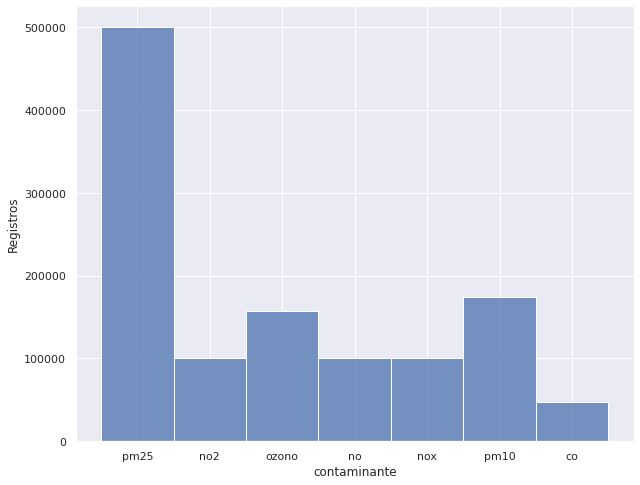

In [8]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('Registros')
sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

## **Muestra aleatoria de tamaño definido**

Se ha elegido un tamaño de muestra representativo de $n=1600$ datos

In [16]:
muestraContaminantes = datosContaminantes.sample(n=1600)  # muestra aleatoria de tamaño 1000
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
767296,2019-10-15,Tuesday,4,9.0000,1,1,44,pm25
595079,2018-11-14,Wednesday,16,57.0000,1,1,12,pm10
967611,2021-01-07,Thursday,22,21.3542,1,1,79,pm25
667279,2019-03-31,Sunday,18,39.0057,1,1,79,pm25
667677,2019-04-01,Monday,16,54.7000,1,1,25,nox
...,...,...,...,...,...,...,...,...
694188,2019-05-23,Thursday,2,12.0000,1,1,48,pm25
109486,2015-09-05,Saturday,4,10.8000,1,1,43,ozono
1071307,2021-09-20,Monday,16,61.0000,1,1,6,pm10
19596,2013-12-24,Tuesday,15,29.0000,1,1,12,pm25


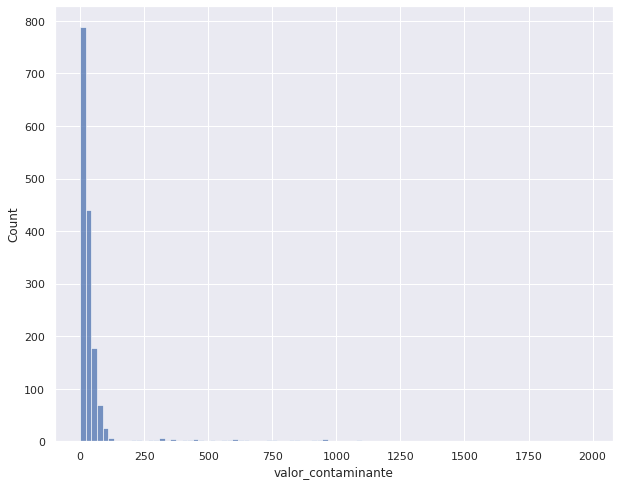

In [17]:
sns.set_theme(style='dark')

sns.histplot(muestraContaminantes, x='valor_contaminante', bins=90)
sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

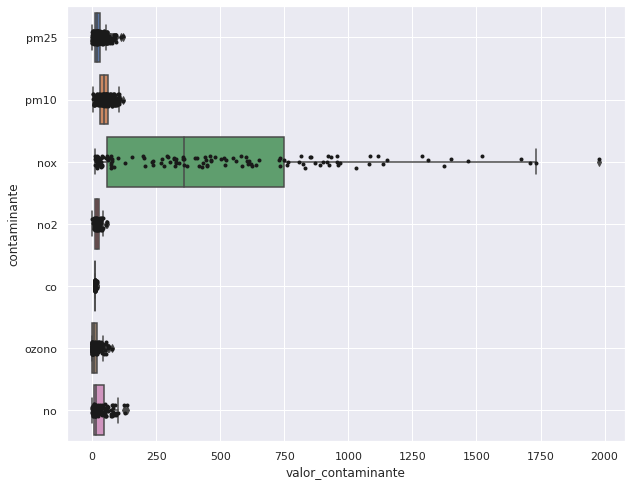

In [18]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

## **Contaminante pm2.5 para la muestra aleatoria**

Veamos la distribución del contaminante pm2.5 para la muestra aleatoria extraída de tamaño $n=1000$ representando los datos mediante un diagrama de cajas y bigotes

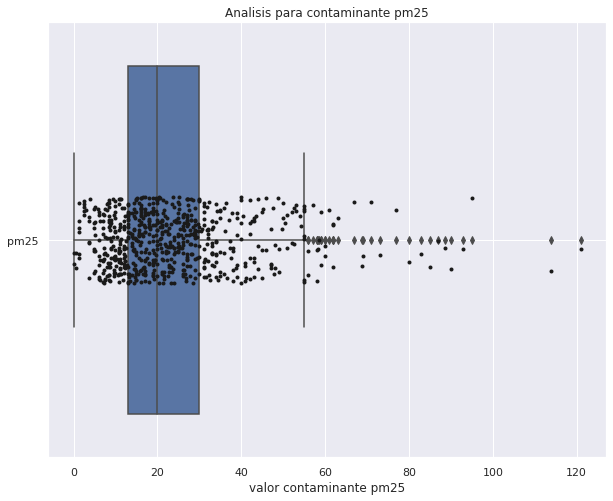

In [19]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(12, 6)})

plt.title("Analisis para contaminante pm25"); plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid(); plt.show()

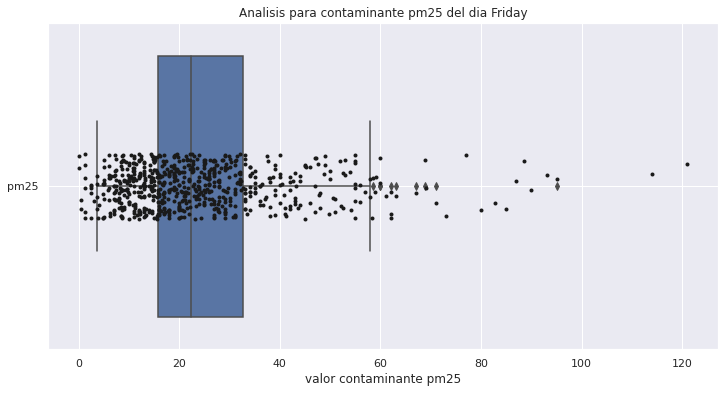

In [23]:
dia = 'Friday'

sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes[ (muestraContaminantes['contaminante'] == 'pm25') & \
                                       (muestraContaminantes['Dia_Semana'] == dia) ],
            x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(12, 6)})

plt.title(f"Analisis para contaminante pm25 del dia {dia}"); plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid(); plt.show()

In [ ]:
# Test line